Project Goals
# What is the distribution of conservation_status for animals?
# Are certain types of species more likely to be endangered?
# Are the differences between species and their conservation status significant?
# Which species were spotted the most at each park?

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

species = pd.read_csv('species_info.csv')
observations = pd.read_csv('observations.csv')
print(species.head())


  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...                 NaN  
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)                 NaN  
4                                      Wapiti Or Elk                 NaN  


conservation_status
False    5824
Name: count, dtype: int64
conservation_status
Not Endangered        5633
Species of Concern     161
Endangered              16
Threatened              10
In Recovery              4
Name: count, dtype: int64
conservation_status
Not Endangered        5633
Species of Concern     161
Endangered              16
Threatened              10
In Recovery              4
Name: count, dtype: int64
conservation_status
Not Endangered        0.967205
Species of Concern    0.027644
Endangered            0.002747
Threatened            0.001717
In Recovery           0.000687
Name: proportion, dtype: float64


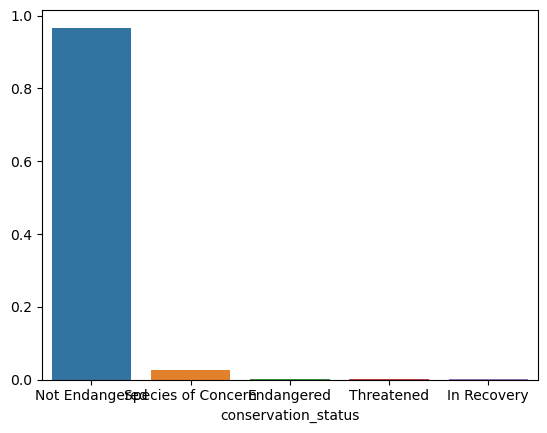

<Figure size 640x480 with 0 Axes>

In [35]:
# What is the distribution of conservation_status for animals?
na_values = species['conservation_status'].isna()
print(na_values.value_counts())
print(species['conservation_status'].value_counts())
species['conservation_status'] = species['conservation_status'].fillna(value='Not Endangered')
print(species['conservation_status'].value_counts())
values = species['conservation_status'].value_counts()
species.scientific_name.duplicated().value_counts()
# plt.bar(species['conservation_status'], (range(len(species))))
proportions = species['conservation_status'].value_counts(normalize=True)
print(proportions)
sns.barplot(x=proportions.index, y=proportions.values)
plt.show()
plt.clf()

In [44]:
# Are certain types of species more likely to be endangered?
#print(species.head())
species['category'].value_counts()
all_endangered = species[species['conservation_status']=='Endangered']
print(all_endangered.head())
print(all_endangered['category'].value_counts())

   category               scientific_name  \
8    Mammal                   Canis lupus   
9    Mammal                   Canis rufus   
34   Mammal             Myotis grisescens   
39   Mammal                Myotis sodalis   
72   Mammal  Glaucomys sabrinus coloratus   

                                         common_names conservation_status  
8                                           Gray Wolf          Endangered  
9                                            Red Wolf          Endangered  
34                                        Gray Myotis          Endangered  
39              Indiana Bat, Indiana Or Social Myotis          Endangered  
72  Carolina Northern Flying Squirrel, Northern Fl...          Endangered  
category
Mammal            7
Bird              4
Fish              3
Vascular Plant    1
Amphibian         1
Name: count, dtype: int64


It looks like a mammal is more likely to be endangered since they have the most of endagered species at 7 total.

In [49]:
# Are the differences between species and their conservation status significant?
species.groupby(['conservation_status', 'category']).scientific_name.count().reset_index()


,conservation_status,category,scientific_name
0,Endangered,Amphibian,1
1,Endangered,Bird,4
2,Endangered,Fish,3
3,Endangered,Mammal,7
4,Endangered,Vascular Plant,1
5,In Recovery,Bird,3
6,In Recovery,Mammal,1
7,Not Endangered,Amphibian,73
8,Not Endangered,Bird,442
9,Not Endangered,Fish,116


In [62]:
# Which species were spotted the most at each park?
print(observations.head())
#observations.groupby(['scientific_name','park_name']).observations.max().reset_index()
#observations.groupby(['park_name', 'scientific_name']).observations.max().reset_index()

# Filter observations for 'Great Smoky Mountains National Park'
smokey_observations = observations[observations['park_name'] == 'Great Smoky Mountains National Park']

# Find the maximum value in the 'observations' column
smokey_max = smokey_observations['observations'].max()

# Print the maximum value
print("Maximum observations in Great Smoky Mountains National Park:", smokey_max)


            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               Yosemite National Park           138
3      Abutilon theophrasti                  Bryce National Park            84
4  Githopsis specularioides  Great Smoky Mountains National Park            85
Maximum observations in Great Smoky Mountains National Park: 147
